In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and preprocess the MNIST dataset
mnist = load_digits()
X_mnist, y_mnist = mnist.data, mnist.target

# Split the data into training and test sets
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Further split the training data into new training and validation sets
X_mnist_train, X_mnist_val, y_mnist_train, y_mnist_val = train_test_split(X_mnist_train, y_mnist_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_val = scaler.transform(X_mnist_val)
X_mnist_test = scaler.transform(X_mnist_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_mnist_train = encoder.fit_transform(y_mnist_train.reshape(-1, 1))
y_mnist_val = encoder.transform(y_mnist_val.reshape(-1, 1))
y_mnist_test = encoder.transform(y_mnist_test.reshape(-1, 1))


/Users/robertnasuti/.local/share/virtualenvs/MultiLayerPerceptron-cyc80dTD/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train the model using sigmoid

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.0914 - val_loss: 0.2484 - val_accuracy: 0.1076
Epoch 2/500
36/36 [==============================] - 0s 886us/step - loss: 0.2490 - accuracy: 0.0914 - val_loss: 0.2383 - val_accuracy: 0.1076
Epoch 3/500
36/36 [==============================] - 0s 855us/step - loss: 0.2389 - accuracy: 0.0914 - val_loss: 0.2287 - val_accuracy: 0.1076
Epoch 4/500
36/36 [==============================] - 0s 870us/step - loss: 0.2294 - accuracy: 0.0914 - val_loss: 0.2196 - val_accuracy: 0.1076
Epoch 5/500
36/36 [==============================] - 0s 837us/step - loss: 0.2203 - accuracy: 0.0914 - val_loss: 0.2109 - val_accuracy: 0.1076
Epoch 6/500
36/36 [==============================] - 0s 827us/step - loss: 0.2118 - accuracy: 0.0914 - val_loss: 0.2028 - val_accuracy: 0.1076
Epoch 7/500
36/36 [==============================] - 0s 818us/step - loss: 0.2037 - accuracy: 0.0914 - val_loss: 0.1951 - val_accuracy: 0.1076
E

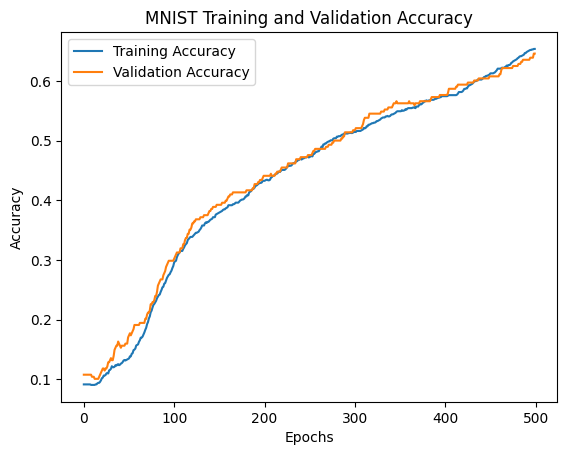

12/12 [==============================] - 0s 598us/step - loss: 0.0755 - accuracy: 0.6222
Accuracy on MNIST: 0.6222222447395325


In [12]:
# Define the model
mnist_model = Sequential([
    Dense(32, input_shape=(64,), activation='sigmoid'),  # hidden layer with 32 neurons and ReLU activation
    Dense(10, activation='sigmoid')  # output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
mnist_model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_mnist_train, y_mnist_train, validation_data=(X_mnist_val, y_mnist_val), epochs=500)

# Plot training and validation accuracy
plt.plot(mnist_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on MNIST
mnist_accuracy = mnist_model.evaluate(X_mnist_test, y_mnist_test)[1]
print(f"Accuracy on MNIST: {mnist_accuracy}")

# Train the model using RelU

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.0879 - val_loss: 0.6725 - val_accuracy: 0.0660
Epoch 2/500
36/36 [==============================] - 0s 922us/step - loss: 0.7055 - accuracy: 0.0879 - val_loss: 0.6707 - val_accuracy: 0.0660
Epoch 3/500
36/36 [==============================] - 0s 852us/step - loss: 0.7035 - accuracy: 0.0879 - val_loss: 0.6689 - val_accuracy: 0.0660
Epoch 4/500
36/36 [==============================] - 0s 820us/step - loss: 0.7015 - accuracy: 0.0879 - val_loss: 0.6671 - val_accuracy: 0.0660
Epoch 5/500
36/36 [==============================] - 0s 861us/step - loss: 0.6994 - accuracy: 0.0879 - val_loss: 0.6653 - val_accuracy: 0.0694
Epoch 6/500
36/36 [==============================] - 0s 841us/step - loss: 0.6975 - accuracy: 0.0879 - val_loss: 0.6635 - val_accuracy: 0.0694
Epoch 7/500
36/36 [==============================] - 0s 849us/step - loss: 0.6955 - accuracy: 0.0888 - val_loss: 0.6617 - val_accuracy: 0.0694
E

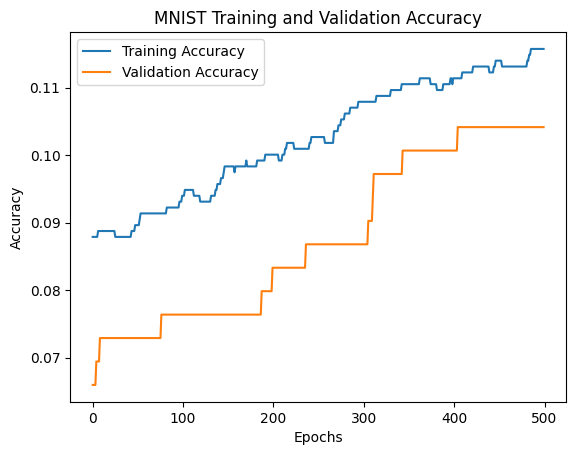

12/12 [==============================] - 0s 896us/step - loss: 0.2574 - accuracy: 0.1056
Accuracy on MNIST: 0.10555555671453476


In [18]:
# Define the model
mnist_model = Sequential([
    Dense(32, input_shape=(64,), activation='relu', kernel_initializer='he_normal'),  
    Dense(10, activation='relu', kernel_initializer='he_normal')  
])

# Compile the model
mnist_model.compile(optimizer=SGD(learning_rate=0.000035), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_mnist_train, y_mnist_train, validation_data=(X_mnist_val, y_mnist_val), epochs=500)

# Plot training and validation accuracy
plt.plot(mnist_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on MNIST
mnist_accuracy = mnist_model.evaluate(X_mnist_test, y_mnist_test)[1]
print(f"Accuracy on MNIST: {mnist_accuracy}")

# Training the model using TanH

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.0557 - val_loss: 0.4826 - val_accuracy: 0.0660
Epoch 2/500
36/36 [==============================] - 0s 878us/step - loss: 0.4875 - accuracy: 0.0557 - val_loss: 0.4806 - val_accuracy: 0.0660
Epoch 3/500
36/36 [==============================] - 0s 836us/step - loss: 0.4854 - accuracy: 0.0566 - val_loss: 0.4787 - val_accuracy: 0.0694
Epoch 4/500
36/36 [==============================] - 0s 821us/step - loss: 0.4833 - accuracy: 0.0574 - val_loss: 0.4768 - val_accuracy: 0.0694
Epoch 5/500
36/36 [==============================] - 0s 796us/step - loss: 0.4812 - accuracy: 0.0583 - val_loss: 0.4748 - val_accuracy: 0.0694
Epoch 6/500
36/36 [==============================] - 0s 817us/step - loss: 0.4791 - accuracy: 0.0609 - val_loss: 0.4729 - val_accuracy: 0.0729
Epoch 7/500
36/36 [==============================] - 0s 819us/step - loss: 0.4770 - accuracy: 0.0627 - val_loss: 0.4710 - val_accuracy: 0.0729
E

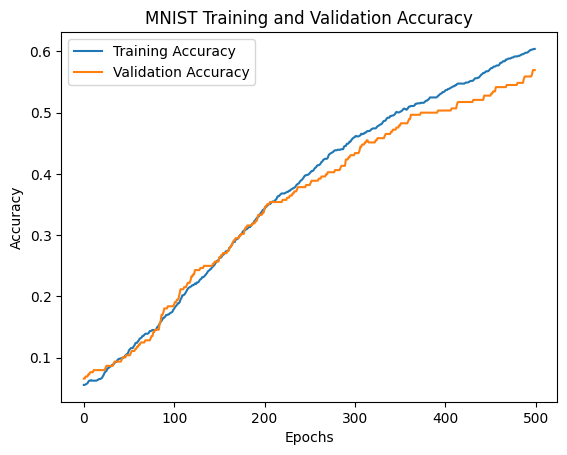

12/12 [==============================] - 0s 579us/step - loss: 0.1290 - accuracy: 0.6000
Accuracy on MNIST: 0.6000000238418579


In [16]:
# Define the model
mnist_model = Sequential([
    Dense(32, input_shape=(64,), activation='tanh'),  # hidden layer with 32 neurons and ReLU activation
    Dense(10, activation='tanh')  # output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
mnist_model.compile(optimizer=SGD(learning_rate=0.0005), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_mnist_train, y_mnist_train, validation_data=(X_mnist_val, y_mnist_val), epochs=500)

# Plot training and validation accuracy
plt.plot(mnist_history.history['accuracy'], label='Training Accuracy')
plt.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on MNIST
mnist_accuracy = mnist_model.evaluate(X_mnist_test, y_mnist_test)[1]
print(f"Accuracy on MNIST: {mnist_accuracy}")